Import Packages

In [30]:


import os
import sys
import importlib
from importlib import reload 
from dataclasses import dataclass, field, fields
from itertools import compress
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

import scipy
import scipy.io as sio
from scipy import signal
from scipy.signal import spectrogram, hann, butter, filtfilt, freqz
from scipy import stats

import seaborn as sns
import pingouin as pg
import itertools
from itertools import combinations
from statannotations.Annotator import Annotator
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report

# import openpyxl
# from openpyxl import Workbook, load_workbook
# import xlrd
import pickle
import json
import csv

#mne
import mne_bids
import mne
from mne.time_frequency import tfr_morlet 
from mne.stats import permutation_cluster_test

# FOOOF
import fooof
from fooof.plts.spectra import plot_spectrum


# TODO: add README file: 
# pip install pingouin
# pip install statannotations
# pip install fooof

In [42]:
#######################     USE THIS DIRECTORY FOR IMPORTING PYPERCEIVE REPO  #######################

# create a path to the BetaSenSightLongterm folder 
# and a path to the code folder within the BetaSenSightLongterm Repo
BetaSenSightLongterm_path = os.getcwd()
while BetaSenSightLongterm_path[-16:] != 'ResearchProjects':
    BetaSenSightLongterm_path = os.path.dirname(BetaSenSightLongterm_path)

# directory to PyPerceive code folder
PyPerceive_path = os.path.join(BetaSenSightLongterm_path,'PyPerceive_project', 'code', 'PyPerceive', 'code')
sys.path.append(PyPerceive_path)

# # change directory to PyPerceive code path within BetaSenSightLongterm Repo
os.chdir(PyPerceive_path)
os.getcwd()

'/Users/jenniferbehnke/Dropbox/work/ResearchProjects/PyPerceive_project/code/PyPerceive/code'

In [43]:
from PerceiveImport.classes import (
    main_class, modality_class, metadata_class,
    session_class, condition_class, task_class,
    contact_class, run_class
)
import PerceiveImport.methods.load_rawfile as load_rawfile
import PerceiveImport.methods.find_folders as find_folders
import PerceiveImport.methods.metadata_helpers as metaHelpers

importlib.reload(main_class)
importlib.reload(session_class)
importlib.reload(task_class)
importlib.reload(condition_class)
importlib.reload(contact_class)
importlib.reload(metadata_class)
importlib.reload(modality_class)
importlib.reload(load_rawfile)
importlib.reload(find_folders)
importlib.reload(run_class)
importlib.reload(metaHelpers)

<module 'PerceiveImport.methods.metadata_helpers' from '/Users/jenniferbehnke/Dropbox/work/ResearchProjects/PyPerceive_project/code/PyPerceive/code/PerceiveImport/methods/metadata_helpers.py'>

In [44]:
#######################     USE THIS DIRECTORY FOR WORKING WITH FOLDERS INSIDE OF CODE FOLDER OF BETASENSIGHTLONGTERM REPO  #######################


# create a path to the BetaSenSightLongterm folder 
# and a path to the code folder within the BetaSenSightLongterm Repo
current_path = os.getcwd()
while current_path[-16:] != 'ResearchProjects':
    current_path = os.path.dirname(current_path)

# directory to code folder
code_path = os.path.join(current_path, 'BetaSenSightLongterm','code', 'meet')
sys.path.append(code_path)

# # change directory to code path within BetaSenSightLongterm Repo
os.chdir(code_path)
os.getcwd()

import meet as meet
#######################     USE THIS DIRECTORY FOR WORKING WITH FOLDERS INSIDE OF CODE FOLDER OF BETASENSIGHTLONGTERM REPO  #######################


# create a path to the BetaSenSightLongterm folder 
# and a path to the code folder within the BetaSenSightLongterm Repo
current_path = os.getcwd()
while current_path[-16:] != 'ResearchProjects':
    current_path = os.path.dirname(current_path)

# directory to code folder
code_path = os.path.join(current_path, 'BetaSenSightLongterm','code', 'BetaSenSightLongterm')
sys.path.append(code_path)

# # change directory to code path within BetaSenSightLongterm Repo
os.chdir(code_path)
os.getcwd()

'/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm'

In [45]:

# tfr, processing
import src.bssu.tfr.BSSuPsd as BSSuPsd
import src.bssu.tfr.FastFourierPSD as FFpsd
import src.bssu.tfr.TimeFrequency as time_frequency
import src.bssu.tfr.bssu_from_source_JSON as bssu_json
import src.bssu.tfr.fooof_fit as fooof_fit
import src.bssu.tfr.fooof_peak_analysis as fooof_peaks

# bipolar Channel Analysis
import src.bssu.bipolar.power_spectra_plots as power_spectra_plots
import src.bssu.bipolar.PeakFrequencies_PSD as PeakFrequency_psd
import src.bssu.bipolar.BIP_channelGroups as BIP_channelGroups
import src.bssu.bipolar.BIP_perChannelAnalysis as BIP_perChannel
import src.bssu.bipolar.cluster_perm as cluster_perm
import src.bssu.bipolar.updrs_beta as updrs_beta

# monopolar Referencing
import src.bssu.monopolar.MonoRef_JLB as MonoRefJLB
import src.bssu.monopolar.GroupMonopolarPSD as groupMonopol

# Ranking Order
import src.bssu.ranking.HighestRankedChannelPSD as highestRank
import src.bssu.ranking.monopolPSDaverage_withinSubject as PSDaverageMonopol
import src.bssu.ranking.BIPchannelGroups_ranks as BIP_ranks
import src.bssu.ranking.Permutation_rankings as Permute_ranks


# Clinical stimulation parameters
import src.bssu.stimulation.activeStimulationContacts as activeStimContacts

# utility functions
import src.bssu.utils.loadResults as loadResults
import src.bssu.utils.find_folders as find_folders
import src.bssu.utils.writeGroupDataframes as writeGroupDF

# import Classes
from src.bssu.classes import (metadataAnalysis_class, mainAnalysis_class, sessionAnalysis_class, 
                              channelAnalysis_class, featureAnalysis_class, frequencyBand_class)

# import mni coordinates
import src.bssu.mni.load_rotated_coordinates as load_mni


importlib.reload(BSSuPsd)
importlib.reload(MonoRefJLB)
importlib.reload(loadResults)
importlib.reload(highestRank)
importlib.reload(groupMonopol)
importlib.reload(PSDaverageMonopol)
importlib.reload(FFpsd)
importlib.reload(find_folders)
importlib.reload(metadataAnalysis_class)
importlib.reload(mainAnalysis_class)
importlib.reload(sessionAnalysis_class)
importlib.reload(channelAnalysis_class)
importlib.reload(featureAnalysis_class)
importlib.reload(frequencyBand_class)
importlib.reload(PeakFrequency_psd)
importlib.reload(power_spectra_plots)
importlib.reload(BIP_channelGroups)
importlib.reload(BIP_ranks)
importlib.reload(activeStimContacts)
importlib.reload(Permute_ranks)
importlib.reload(BIP_perChannel)
importlib.reload(load_mni)
importlib.reload(writeGroupDF)
importlib.reload(cluster_perm)
importlib.reload(time_frequency)
importlib.reload(bssu_json)
importlib.reload(fooof_fit)
importlib.reload(fooof_peaks)
importlib.reload(updrs_beta)

<module 'src.bssu.bipolar.updrs_beta' from '/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/bipolar/updrs_beta.py'>

In [6]:
# load if you want to see complete Dataframes
pd.set_option("display.max_rows", None)

## 0. Compute Fourier Transform to frequency domain

In [1]:
hemispheres = ["Right", "Left"]
filter = ["band-pass", "unfiltered"]

for hem in hemispheres:

    for filt in filter:

        FF_psd = FFpsd.spectrogram_Psd(
            incl_sub = "041", 
            incl_session = ["fu3m", "fu12m", "fu18m"],
            incl_condition = ["m0s0"],
            pickChannels=['03', '13', '02', '12', '01', '23',
                        '1A1B', '1B1C', '1A1C', '2A2B', '2B2C', '2A2C',
                        '1A2A', '1B2B', '1C2C'],
            hemisphere=hem,
            filter=filt)

# TODO: for each new patient run both: band-pass and unfiltered 
# always run both: Left and Right hemisphere
# for now, only choose m0s0 as condition


# new power spectra: TODO "030" (24mfu perceive error), "041" (visit at home)
# "019", "021", "024", "028", "033", "065"
# 2nd round: "036", "040", "048", "049", "052", "055", "066"

In [15]:
path = find_folders.get_local_path(folder="figures", sub="017")
path

'/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/figures/sub-017'

In [14]:
# load with pyPerceive

# TODO: Problem with channel names of sub040 12MFU

mainclass_sub = main_class.PerceiveData(
        sub = "041", 
        incl_modalities= ["survey"],
        incl_session = ["fu18m"],
        incl_condition = ["m0s0"],
        incl_task = ["rest"],
        incl_contact=["RingR", "SegmIntraR", "SegmInterR"]
        )



	### WARNING: NaNs in Metadata Table sub-040 ###
NaNs in: sub-20220329PStn_ses-2022062406574197_run-BrainSense20220624071600.mat
NaNs in: sub-20220329PStn_ses-2022062406574197_run-BrainSense20220624073100.mat
NaNs in: sub-20220329PStn_ses-2022062406574197_run-BrainSense20220624074600.mat
NaNs in: sub-20220329PStn_ses-2022062406574197_run-BrainSense20220624080100.mat
NaNs in: sub-20220329PStn_ses-2022062406574197_run-BrainSense20220624081700.mat
Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
Creating RawArray with float64 data, n_channels=3, n_times=5188
    Range : 0 ... 5187 =      0.000 ...    20.748 secs
Ready.
Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
Creating RawArray with float64 data, n_channel

In [17]:
mainclass_sub.survey.fu12m.m0s0.rest.SegmInterR.run1.data.info.ch_names

['LFP_Stn_R_1_A1_A', 'LFP_Stn_R_1_B1_B', 'LFP_Stn_R_1_C1_C']

## 0. Plot Time Frequency spectra and check for any artifacts (movement artifacts as vertical lines across all frequencies)

- band-pass filtered signal 5-95 Hz
- window length 1 second (250 samples)
- overlap 50%

In [64]:
filter = ["band-pass", "unfiltered"]

for filt in filter:

    TimeFrequencyPlot = time_frequency.time_frequency(
        incl_sub=["041"],
        incl_session=["fu3m", "fu12m", "fu18m"],
        incl_condition=["m0s0"],
        filter_signal=filt 
    )

# ["RingR", "SegmIntraR", "SegmInterR"]
# ["RingL", "SegmIntraL", "SegmInterL"]

# 2nd round: "036", "040", "048", "049", "052", "055", "065"

In [25]:
mainclass_sub = main_class.PerceiveData(
        sub = "050", 
        incl_modalities= ["survey"],
        incl_session = ["fu3m", "fu12m"],
        incl_condition = ["m0s0"],
        incl_task = ["rest"],
        incl_contact=["RingL", "SegmIntraL", "SegmInterL"]
        )


	### WARNING: NaNs in Metadata Table sub-050 ###
NaNs in: sub-20220413PStn_ses-2022072206580697_run-BrainSense20220722072800.mat
NaNs in: sub-20220413PStn_ses-2022072206580697_run-BrainSense20220722074300.mat
NaNs in: sub-20220413PStn_ses-2022072206580697_run-BrainSense20220722075800.mat
NaNs in: sub-20220413PStn_ses-2022072206580697_run-BrainSense20220722081300.mat
NaNs in: sub-20220413PStn_ses-2022072206580697_run-BrainSense20220722083000.mat
Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
Creating RawArray with float64 data, n_channels=3, n_times=5187
    Range : 0 ... 5186 =      0.000 ...    20.744 secs
Ready.
Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
Creating RawArray with float64 data, n_channel

In [38]:
unfiltered = mainclass_sub.survey.fu12m.m0s0.rest.RingL.run1.data.get_data()[0,:]

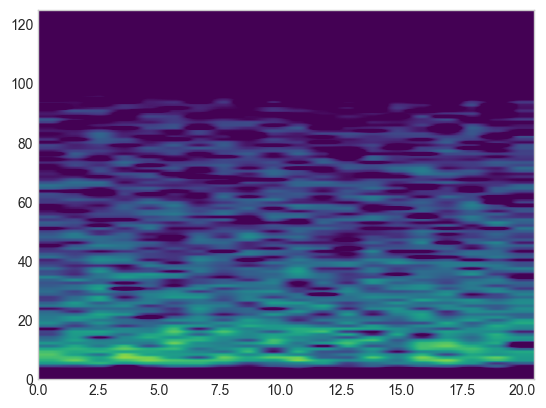

In [48]:
dat = mainclass_sub.survey.fu12m.m0s0.rest.RingL.run1.data.get_data()
my_dat = dat[0,:]

filter_order = 5 # in MATLAB spm_eeg_filter default=5 Butterworth
frequency_cutoff_low = 5 # 5Hz high-pass filter
frequency_cutoff_high = 95
fs = 250
b, a = scipy.signal.butter(filter_order, (frequency_cutoff_low, frequency_cutoff_high), btype='bandpass', output='ba', fs=fs)

filtered = scipy.signal.filtfilt(b, a, my_dat) 
noverlap = 0


plt.specgram(x = filtered, Fs = fs, noverlap = noverlap, cmap = 'viridis', vmin = -25, vmax = 10)

plt.grid(False)

## 1. Load with classes

In [41]:
path = find_folders.get_onedrive_path_mac(folder="sourcedata")


Using PyPerceive

In [46]:
mainclass_sub = main_class.PerceiveData(
    sub = "041", 
    incl_modalities=['survey'],
    incl_session = ["fu3m", "fu12m", "fu18m"],
    incl_condition =['m0s0'],
    incl_task = ["rest"],
    incl_contact = ["RingR", "SegmInterR", "SegmIntraR"],
    import_json=False, # for addtionally loading the corresponding JSON files as source files, set to True
    warn_for_metaNaNs=True, 
)


	### WARNING: NaNs in Metadata Table sub-041 ###
NaNs in: sub-20220404PStn_ses-2022071206564297_run-BrainSense20220712073400.mat
NaNs in: sub-20220404PStn_ses-2022071206564297_run-BrainSense20220712075100.mat
NaNs in: sub-20220404PStn_ses-2022071206564297_run-BrainSense20220712080900.mat
NaNs in: sub-20220404PStn_ses-2022071206564297_run-BrainSense20220712082700.mat
NaNs in: sub-20220404PStn_ses-2022071206564297_run-BrainSense20220712084400.mat
Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
Creating RawArray with float64 data, n_channels=3, n_times=5187
    Range : 0 ... 5186 =      0.000 ...    20.744 secs
Ready.
Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
Creating RawArray with float64 data, n_channel

Using internal class structure

In [68]:
mainClass_data = mainAnalysis_class.MainClass(
    sub = "017",
    hemisphere = "Right",
    filter = "band-pass",
    result = "PSDaverageFrequencyBands",
    incl_session = ["postop", "fu3m", "fu12m"],
    pickChannels = ['03', '13', '02', '12', '01', '23', 
                    '1A1B', '1B1C', '1A1C', '2A2B', '2B2C', '2A2C', 
                    '1A2A', '1B2B', '1C2C'],
    normalization = ["rawPsd"],
    freqBands = ["beta"],
    feature= ["averagedPSD"]
)

In [69]:
mainClass_data.fu3m.BIP_01.Result_DF

,condition,session,bipolarChannel,frequencyBand,absoluteOrRelativePSD,averagedPSD
m0s0_fu3m_LFP_R_01_STN_MT_psdAverage_rawPsd_alpha,m0s0,fu3m,LFP_R_01_STN_MT,alpha,rawPsd,0.441523
m0s0_fu3m_LFP_R_01_STN_MT_psdAverage_rawPsd_lowBeta,m0s0,fu3m,LFP_R_01_STN_MT,lowBeta,rawPsd,0.149506
m0s0_fu3m_LFP_R_01_STN_MT_psdAverage_rawPsd_highBeta,m0s0,fu3m,LFP_R_01_STN_MT,highBeta,rawPsd,0.122228
m0s0_fu3m_LFP_R_01_STN_MT_psdAverage_rawPsd_beta,m0s0,fu3m,LFP_R_01_STN_MT,beta,rawPsd,0.131716
m0s0_fu3m_LFP_R_01_STN_MT_psdAverage_rawPsd_narrowGamma,m0s0,fu3m,LFP_R_01_STN_MT,narrowGamma,rawPsd,0.027093
m0s0_fu3m_LFP_R_01_STN_MT_psdAverage_normPsdToTotalSum_alpha,m0s0,fu3m,LFP_R_01_STN_MT,alpha,normPsdToTotalSum,4.481271
m0s0_fu3m_LFP_R_01_STN_MT_psdAverage_normPsdToTotalSum_lowBeta,m0s0,fu3m,LFP_R_01_STN_MT,lowBeta,normPsdToTotalSum,1.517421
m0s0_fu3m_LFP_R_01_STN_MT_psdAverage_normPsdToTotalSum_highBeta,m0s0,fu3m,LFP_R_01_STN_MT,highBeta,normPsdToTotalSum,1.240568
m0s0_fu3m_LFP_R_01_STN_MT_psdAverage_normPsdToTotalSum_beta,m0s0,fu3m,LFP_R_01_STN_MT,beta,normPsdToTotalSum,1.336865
m0s0_fu3m_LFP_R_01_STN_MT_psdAverage_normPsdToTotalSum_narrowGamma,m0s0,fu3m,LFP_R_01_STN_MT,narrowGamma,normPsdToTotalSum,0.274983


In [ ]:
incl_sub = ["017", "019", "021", "024", "025", "026", "029", "030", "031", "032", "033", "037", "038", "041", "045", "060"]
hemispheres = ["Right", "Left"]

psdAverage_dataframe = pd.DataFrame()

for sub in incl_sub:

    for hem in hemispheres:

        # load data from classes
        mainClass_data = mainAnalysis_class.MainClass(
            sub=sub,
            hemisphere=hem,
            filter="band-pass",
            result="PSDaverageFrequencyBands",
            incl_session=["fu3m"],
            pickChannels=['03', '13', '02', '12', '01', '23', 
                            '1A1B', '1B1C', '1A1C', '2A2B', '2B2C', '2A2C', 
                            '1A2A', '1B2B', '1C2C'],
            normalization=["rawPsd"],
            freqBands=["beta", "lowBeta", "highBeta"],
            feature=["averagedPSD"]
        )

        # get the fu3m Dataframe
        fu3m_DF = mainClass_data.fu3m.Result_DF
        fu3m_DF_copy = fu3m_DF.copy()

        # add columnn subject_hemisphere
        fu3m_DF_copy["subject_hemisphere"] = f"{sub}_{hem}"

        # add column recording_montage
        for index, row in fu3m_DF_copy.iterrows():
            bipolarChannel = row["bipolarChannel"].split("_")
            recording_montage = bipolarChannel[2] # just take 03, 02, etc from bipolarChannel column

            fu3m_DF_copy.loc[index, "recording_montage"] = recording_montage
        
        # only get rows with rawPsd and beta 
        fu3m_DF_copy = fu3m_DF_copy[fu3m_DF_copy.absoluteOrRelativePSD == "rawPsd"]
        fu3m_DF_copy = fu3m_DF_copy[fu3m_DF_copy.frequencyBand == "beta"]

        # rename column averagedPSD to beta_psd
        fu3m_DF_copy = fu3m_DF_copy.rename(columns={"averagedPSD": "beta_psd"})
        
        # drop columns bipolarChannel, 
        fu3m_DF_copy = fu3m_DF_copy.drop(columns=["bipolarChannel", "frequencyBand", "absoluteOrRelativePSD"])

        # concatenate all dataframes together
        psdAverage_dataframe = pd.concat([psdAverage_dataframe, fu3m_DF_copy], ignore_index=True)
                



# write Dataframe to Excel
# store each Dataframe in seperate sheets of an Excel file
current_path = os.getcwd()
while current_path[-8:] != 'Research':
    current_path = os.path.dirname(current_path)

Excel_path = os.path.join(current_path, 'Longterm_beta_project','data', 'imagingData', 'SenSight_fu3m_beta_psd.xlsx')

# create an Excel writer, so that different sheets are written within the same excel file
with pd.ExcelWriter(Excel_path) as writer:
    
    psdAverage_dataframe.to_excel(writer, sheet_name="beta_psd")


## 2. Write Dataframes

In [9]:
write_DF_function = writeGroupDF.write_BIPChannelGroups_ALLpsd(
    incl_sub=["017", "019", "021", "024", "025", "026", "028", "029", "030", "031", "032", "033", "038", 
              "041", "045", "047", "050", "059", "060", "061", "062", "063"], 
    signalFilter="band-pass",
    normalization="rawPsd",
    freqBand="beta"
)

In [36]:
write_DF_function["psdAverage_dataframe"].head()

,session,absoluteOrRelativePSD,highBeta_psd,subject_hemisphere,recording_montage,recording_montage_group,recording_montage_specificGroup,condition
0,fu3m,normPsdToSum40_90Hz,14.791108,017_Right,03,circular,circular_ring_ring,NaN
1,fu3m,normPsdToSum40_90Hz,15.316289,017_Right,13,circular,circular_ring_segm_long,NaN
2,fu3m,normPsdToSum40_90Hz,29.281802,017_Right,02,circular,circular_ring_segm_long,NaN
3,fu3m,normPsdToSum40_90Hz,20.030445,017_Right,12,circular,circular_segm_segm,NaN
4,fu3m,normPsdToSum40_90Hz,8.922624,017_Right,01,circular,circular_ring_segm_short,NaN


write Dataframe for all subject hemispheres with ranks and relative PSD to rank 1

In [12]:
loaded_DF = writeGroupDF.write_BIPChannelGroups_psdRanks_relToRank1(
    signalFilter="band-pass",
    normalization="rawPsd",
    freqBand="beta"
)

pickle file loaded:  BIPChannelGroups_ALL_beta_rawPsd_band-pass.pickle 
loaded from:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results
file:  BIPChannelGroups_psdRanks_relToRank1_beta_rawPsd_band-pass.pickle 
written in:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results


In [32]:
loaded_DF["psdRank_and_relative_dataframe"].head()

,session,absoluteOrRelativePSD,beta_psd,subject_hemisphere,recording_montage,recording_montage_group,recording_montage_specificGroup,condition,rank,relativePSD_to_beta_Rank1
0,fu3m,rawPsd,0.298595,017_Right,12,circular,circular_segm_segm,NaN,2.0,0.998455
1,fu3m,rawPsd,0.131716,017_Right,01,circular,circular_ring_segm_short,NaN,3.0,0.440439
2,fu3m,rawPsd,0.299057,017_Right,23,circular,circular_ring_segm_short,NaN,1.0,1.000000
3,fu12m,rawPsd,0.189567,017_Right,12,circular,circular_segm_segm,NaN,3.0,0.240420
4,fu12m,rawPsd,0.242426,017_Right,01,circular,circular_ring_segm_short,NaN,2.0,0.307458


In [ ]:
loaded_DF = loadResults.load_BIPChannelGroups_ALL(
    freqBand="beta",
    normalization="rawPsd",
    signalFilter="band-pass"
)

In [ ]:
loaded_DF.head()

In [ ]:
loadedDF = loadResults.load_BIPChannelGroups_psdRanks_relToRank1(
    freqBand="beta",
    normalization="rawPsd",
    signalFilter="band-pass"
)

## 3. Load MNI coordinates

import scipy.io as sio

In [9]:
mni_coord = load_mni.load_mni_coordinates(
    incl_sub=["017", "021", "024", "025", "026", "029", "030", "031", "032", "033", "035", "037", "038", "040"]
)

017
021
024
025
026
029
030
031
032
033
035
037
038
040


In [10]:
dataframe = mni_coord["reco_native_concat"]

In [ ]:
current_path = os.getcwd()
while current_path[-8:] != 'Research':
    current_path = os.path.dirname(current_path)

excel_path = os.path.join(current_path, 'Longterm_beta_project','data', 'imagingData', "SenSightElectrode_coordinates.xlsx")

Excel = dataframe.to_excel(excel_path, sheet_name="reco_native")

In [ ]:
mni_file = sio.loadmat(filename)
reco_native = mni_file["reco"][0][0][1]
reco_scrf = mni_file["reco"][0][0][2]
reco_mni = mni_file["reco"][0][0][3]

reco_native_left = reco_native[0][0][0][0][1]
reco_native_right = reco_native[0][0][0][0][0]
reco_native_right

In [ ]:
reco_native_right_DF = pd.DataFrame(reco_native_right, columns=["reco_native_x", "reco_native_y", "reco_native_z"])
reco_native_right_DF.insert(0, "subject_hemisphere", "017_right")
reco_native_right_DF

In [ ]:
reco_scrf = mni_file["reco"][0][0][2]
reco_scrf_right = reco_scrf[0][0][0][0][0]
reco_scrf_left = reco_scrf[0][0][0][0][1]
reco_scrf_right

In [ ]:
reco_mni = mni_file["reco"][0][0][3]
reco_mni_right = reco_mni[0][0][0][0][0]
reco_mni_left =  reco_mni[0][0][0][0][1]

In [ ]:
# coordinates=scrf and =mni, doesn´t work if sub019 or sub034 are included because coordinates don´t exists!!

mni_mean_coord = load_mni.calculate_mean_coordinates_bipolarRecordings(
    incl_sub=["017", "021", "024", "025", "026", "029", "030", "031", "032", "033", "037", "038", "040"],
    coordinates="mni"
)

In [ ]:
mni_mean_coord["merged_Dataframe"]

Calculate MEAN xyz native coordinates of each recording montage per subject_hemisphere

In [ ]:
subject_list = ["017", "019", "021", "024", "025", "026", "029", "030", "031", "032", "033", "034", "035", "037", "038", "040"]
hemispheres = ["Right", "Left"]

current_path = os.getcwd()
while current_path[-8:] != 'Research':
    current_path = os.path.dirname(current_path)

reco_native_concat = pd.DataFrame()

for sub in subject_list:
    
    # directory to data folder with mni coordinates
    data_path = os.path.join(current_path, 'Longterm_beta_project','data', 'imagingData', f"sub-{sub}")
    filename = os.path.join(data_path, "ea_reconstruction.mat")

    # load .mat file
    mni_file = sio.loadmat(filename)

    print(sub)

    reco_native = mni_file["reco"][0][0][1]


    for h, hem in enumerate(hemispheres):
        
        reco_native_hem = reco_native[0][0][0][0][h] # 0 = Right, 1 = Left
        reco_native_DF = pd.DataFrame(reco_native_hem, columns=["reco_native_x", "reco_native_y", "reco_native_z"])
        reco_native_DF.insert(0, "subject_hemisphere", f"{sub}_{hem}") # insert column with subject_hemisphere on first position
        reco_native_concat = pd.concat([reco_native_concat, reco_native_DF], ignore_index=True)

In [ ]:
sub_list = list(reco_native_concat.subject_hemisphere.unique())
len(sub_list)

In [ ]:
reco_native_concat

contact_list = ["0", "1A", "1B", "1C", "2A", "2B", "2C", "3"] * 32

reco_native_concat["electrode_contact"] = contact_list
# reco_native_concat["electrode_contact"] = reco_native_concat[["subject_hemisphere", "electrode_contact"]].apply("_".join, axis=1)
reco_native_concat

In [ ]:
sub_hem_unique = list(reco_native_concat.subject_hemisphere.unique())
contact_list = ["0", "1A", "1B", "1C", "2A", "2B", "2C", "3"]
recording_montage_list = ["0_3", "1_3", "0_2", "1_2", "0_1", "2_3", "1A_1B", "1B_1C", "1A_1C", "2A_2B", "2B_2C", "2A_2C", "1A_2A", "1B_2B", "1C_2C"]


x_val = {}
y_val = {}
z_val = {}
x_mean_coordinate = {}
y_mean_coordinate = {}
z_mean_coordinate = {}

for sub_hem in sub_hem_unique:

    # only take DF of one electrode
    single_electrode = reco_native_concat[reco_native_concat.subject_hemisphere == sub_hem]


    for c in contact_list:

        single_contact = single_electrode[single_electrode.electrode_contact == c]

        x_val[f"{sub_hem}_{c}"] = float(single_contact.reco_native_x.values)
        y_val[f"{sub_hem}_{c}"] = float(single_contact.reco_native_y.values)
        z_val[f"{sub_hem}_{c}"] = float(single_contact.reco_native_z.values)

    # calculate mean x, y, z coordinates for 1 and 2
    x_val[f"{sub_hem}_1"] = np.mean([x_val[f"{sub_hem}_1A"], x_val[f"{sub_hem}_1B"], x_val[f"{sub_hem}_1C"]])
    y_val[f"{sub_hem}_1"] = np.mean([y_val[f"{sub_hem}_1A"], y_val[f"{sub_hem}_1B"], y_val[f"{sub_hem}_1C"]])
    z_val[f"{sub_hem}_1"] = np.mean([z_val[f"{sub_hem}_1A"], z_val[f"{sub_hem}_1B"], z_val[f"{sub_hem}_1C"]])

    x_val[f"{sub_hem}_2"] = np.mean([x_val[f"{sub_hem}_2A"], x_val[f"{sub_hem}_2B"], x_val[f"{sub_hem}_2C"]])
    y_val[f"{sub_hem}_2"] = np.mean([y_val[f"{sub_hem}_2A"], y_val[f"{sub_hem}_2B"], y_val[f"{sub_hem}_2C"]])
    z_val[f"{sub_hem}_2"] = np.mean([z_val[f"{sub_hem}_2A"], z_val[f"{sub_hem}_2B"], z_val[f"{sub_hem}_2C"]])


for sub_hem in sub_hem_unique:
    for recording in recording_montage_list:

        rec = recording.split("_") # rec[0] is first contact, rec[1] is second contact
        
        x_mean_coordinate[f"{sub_hem}_{recording}"] = np.mean([x_val[f"{sub_hem}_{rec[0]}"], x_val[f"{sub_hem}_{rec[1]}"]])
        y_mean_coordinate[f"{sub_hem}_{recording}"] = np.mean([y_val[f"{sub_hem}_{rec[0]}"], y_val[f"{sub_hem}_{rec[1]}"]])
        z_mean_coordinate[f"{sub_hem}_{recording}"] = np.mean([z_val[f"{sub_hem}_{rec[0]}"], z_val[f"{sub_hem}_{rec[1]}"]])

        
x_mean_df = pd.DataFrame.from_dict(x_mean_coordinate, orient="index", columns=["native_mean_coord_x"])
y_mean_df = pd.DataFrame.from_dict(y_mean_coordinate, orient="index", columns=["native_mean_coord_y"])
z_mean_df = pd.DataFrame.from_dict(z_mean_coordinate, orient="index", columns=["native_mean_coord_z"])

mean_xyz_coord = pd.concat([x_mean_df, y_mean_df, z_mean_df], axis=1)
mean_xyz_coord

In [ ]:
sub_hem_rec = mean_xyz_coord.index.tolist()
sub_hem_rec_tocolumn = []

# extract from the index (017_Right_0_3) sub_hem and recording montage and store in seperate columns

for i, string in enumerate(sub_hem_rec):

    sub_hem_rec_split = string.split("_")

    sub_hem_str = '_'.join([sub_hem_rec_split[0], sub_hem_rec_split[1]])
    rec_str = ''.join([sub_hem_rec_split[2], sub_hem_rec_split[3]])
    sub_hem_rec_string = '_'.join([sub_hem_str, rec_str])
    sub_hem_rec_tocolumn.append(sub_hem_rec_string)


# add columns subject_hemisphere and recording montage to dataframe
mean_xyz_coord["subject_hemisphere_recording"] = sub_hem_rec_tocolumn
mean_xyz_coord

In [ ]:
psdAverage_dataframe["subject_hemisphere_recording"] = psdAverage_dataframe[["subject_hemisphere", "recording_montage"]].agg('_'.join, axis=1)
psdAverage_dataframe.drop(columns=["subject_hemisphere", "recording_montage"])

In [ ]:
merged_DF_native = mean_xyz_coord.merge(psdAverage_dataframe, left_on="subject_hemisphere_recording", right_on="subject_hemisphere_recording")
merged_DF_native.drop(columns=["subject_hemisphere_y", "recording_montage_x"], inplace=True)
merged_DF_native.rename(columns={"subject_hemisphere_x":"subject_hemisphere", "recording_montage_y":"recording_montage"}, inplace=True)
merged_DF_native

In [ ]:
# save as Excel file
current_path = os.getcwd()
while current_path[-8:] != 'Research':
    current_path = os.path.dirname(current_path)

Excel_path = os.path.join(current_path, 'Longterm_beta_project','data', 'imagingData', 'SenSightElectrode_MEANcoordinates_native.xlsx')

# create an Excel writer, so that different sheets are written within the same excel file
with pd.ExcelWriter(Excel_path) as writer:
    
    merged_DF_native.to_excel(writer, sheet_name="mean_reco_native")

MERGE A TABLE: FOOOF BIPOLAR BETA AVERAGE and MNI MEAN COORDINATES

In [37]:
mni_bipolar_beta = load_mni.mean_coordinates_beta_bipolar(
    coordinates="mni"
)

sub-062 has no mni coordinate file
sub-050 has no mni coordinate file
sub-028 has no mni coordinate file
sub-047 has no mni coordinate file
sub-041 has no mni coordinate file
sub-045 has no mni coordinate file
sub-019 has no mni coordinate file
sub-060 has no mni coordinate file
sub-063 has no mni coordinate file
sub-061 has no mni coordinate file
sub-059 has no mni coordinate file


In [27]:
mni_bipolar_beta["fooof_group_copy"]

,index,subject_hemisphere,session,bipolar_channel,fooof_power_spectrum,beta_average,subject_hemisphere_recording
0,3,017_Right,fu3m,12,"[0.0, 0.0, 0.0, 1e-10, 2e-10, 7e-10, 1.8e-09, ...",0.202904,017_Right_12
1,4,017_Right,fu3m,01,"[8.3557e-06, 0.0002934975, 0.006412857, 0.0684...",0.032465,017_Right_01
2,5,017_Right,fu3m,23,"[0.0, 9e-10, 1.81e-08, 3.225e-07, 4.5041e-06, ...",0.203085,017_Right_23
0,12,017_Right,fu3m,1A2A,"[0.0, 0.0, 0.0, 1e-10, 3e-10, 1.5e-09, 6.4e-09...",0.270982,017_Right_1A2A
1,13,017_Right,fu3m,1B2B,"[0.0272617763, 0.0190132646, 0.0179378651, 0.0...",0.161970,017_Right_1B2B
...,...,...,...,...,...,...,...
1,1612,063_Left,fu3m,1B1C,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2e-10, 2e-09, 2...",0.026847,063_Left_1B1C
2,1613,063_Left,fu3m,1A1C,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.042938,063_Left_1A1C
3,1614,063_Left,fu3m,2A2B,"[0.0008634281, 0.0013954614, 0.0028355169, 0.0...",0.355669,063_Left_2A2B
4,1615,063_Left,fu3m,2B2C,"[0.0001660765, 0.0002290709, 0.0004627633, 0.0...",0.142584,063_Left_2B2C


In [31]:
mni_bipolar_beta["mean_xyz_coord"]

,native_mean_coord_x,native_mean_coord_y,native_mean_coord_z,subject_hemisphere_recording,subject_hemisphere,montageType_regular,montageType_specific
025_Right_1_2,13.702702,-20.153435,12.577102,025_Right_12,025_Right,circular,circular_segm_segm
025_Right_0_1,12.997699,-20.723972,10.794559,025_Right_01,025_Right,circular,circular_ring_segm_short
025_Right_2_3,14.425331,-19.568634,14.404207,025_Right_23,025_Right,circular,circular_ring_segm_short
025_Right_1A_2A,13.978776,-19.633505,12.301499,025_Right_1A2A,025_Right,segm_interlevel,segm_interlevel
025_Right_1B_2B,13.095263,-20.116173,12.805420,025_Right_1B2B,025_Right,segm_interlevel,segm_interlevel
...,...,...,...,...,...,...,...
032_Left_1B_1C,-12.791380,-14.728623,1.132918,032_Left_1B1C,032_Left,segm_intralevel,segm_intralevel
032_Left_1A_1C,-12.397222,-14.351157,0.994952,032_Left_1A1C,032_Left,segm_intralevel,segm_intralevel
032_Left_2A_2B,-13.568724,-13.113261,2.183259,032_Left_2A2B,032_Left,segm_intralevel,segm_intralevel
032_Left_2B_2C,-13.458016,-13.507381,2.569637,032_Left_2B2C,032_Left,segm_intralevel,segm_intralevel


In [38]:
mni_bipolar_beta["merged_Dataframe"]

,mni_mean_coord_x,mni_mean_coord_y,mni_mean_coord_z,subject_hemisphere_recording,montageType_regular,montageType_specific,subject_hemisphere,session,bipolar_channel,fooof_power_spectrum,beta_average
0,12.912983,-13.657833,-5.911653,025_Right_12,circular,circular_segm_segm,025_Right,postop,12,"[5.9e-09, 3.6e-08, 2.615e-07, 1.8099e-06, 1.11...",0.041254
1,12.258867,-14.731817,-8.009080,025_Right_01,circular,circular_ring_segm_short,025_Right,postop,01,"[6.12059e-05, 0.0001149171, 0.000267008, 0.000...",0.028509
2,13.607717,-12.548167,-3.727568,025_Right_23,circular,circular_ring_segm_short,025_Right,postop,23,"[8.881784197e-16, 8.881784197e-16, 0.0, 0.0, 1...",0.023896
3,13.147600,-13.226250,-6.415700,025_Right_1A2A,segm_interlevel,segm_interlevel,025_Right,postop,1A2A,"[7.1442508434, 9.5994449683, 8.0373114882, 2.1...",0.223402
4,12.289950,-13.582600,-5.689295,025_Right_1B2B,segm_interlevel,segm_interlevel,025_Right,postop,1B2B,"[2.0640911665, 2.9089359698, 2.1573902832, 0.5...",0.073190
...,...,...,...,...,...,...,...,...,...,...,...
7,-12.932450,-14.717050,-8.751320,032_Left_1B1C,segm_intralevel,segm_intralevel,032_Left,fu3m,1B1C,"[0.0026684417, 0.0041327498, 0.0089702337, 0.0...",0.178355
8,-12.576000,-14.349800,-8.949840,032_Left_1A1C,segm_intralevel,segm_intralevel,032_Left,fu3m,1A1C,"[1.3639e-06, 1.1015e-06, 1.2823e-06, 1.7159e-0...",0.159893
9,-13.606950,-13.066300,-7.618940,032_Left_2A2B,segm_intralevel,segm_intralevel,032_Left,fu3m,2A2B,"[3.9155e-06, 9.5017e-06, 2.97176e-05, 9.60754e...",0.213545
10,-13.463000,-13.361400,-7.176845,032_Left_2B2C,segm_intralevel,segm_intralevel,032_Left,fu3m,2B2C,"[8.81009e-05, 0.0005141295, 0.0028007311, 0.01...",0.153839


## 4. Load PSD rel to rank 1 (=1.0) and rank 8 (=0) contacts

First run monopolar reference method to get monopolar psd values for every subject

In [42]:
monopol_relPsd_0_to_8 = writeGroupDF.write_monopol_rel_psd_from0To8(
    incl_sub=["017", "019", "021", "024", "025", "026", "028", "029", "030", "031", "032", "033", "038"],
    signalFilter="band-pass",
    normalization="rawPsd",
    freqBand="beta"
)

pickle file loaded:  sub017_Right_monoRef_weightedPsdByCoordinateDistance_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results\sub-017
pickle file loaded:  sub017_Left_monoRef_weightedPsdByCoordinateDistance_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results\sub-017
pickle file loaded:  sub019_Right_monoRef_weightedPsdByCoordinateDistance_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results\sub-019
pickle file loaded:  sub019_Left_monoRef_weightedPsdByCoordinateDistance_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results\sub-019
pickle file loaded:  sub021_Right_monoRef_weightedPsdByCoordinateDistance_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results\sub-021
pickle file loaded:  sub021_Left_monoRef_weightedPsdByCoordinateDistance_beta_rawPsd_band-pass.pi

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\jebe12\\Research\\Longterm_beta_project\\results\\sub-041\\sub041_Right_monoRef_weightedPsdByCoordinateDistance_beta_rawPsd_band-pass.pickle'

In [ ]:
monopol_relPsd_0_to_8.head()

## 5. Load BSSu from JSON files, in case of Perceive Error

Load Dataframe from source_json: make sure the source JSON is in the correct folder in the following path:
- BetaSenSightLongterm
- data
- source_json
- sub-XXX
- session
- condition

In [9]:
# Perceive Error: sub030 fu24m m0s0 

source_dataframe = bssu_json.write_source_df_from_JSON(
    sub="030",
    session="fu24m",
    condition="m0s0",
    json_filename="Report_Json_Session_Report_20230830T100130.json"
)

In [10]:
source_dataframe.head()

,subject_hemisphere,session,bipolar_channel,raw_time_series,frequency,rawPsd
0,030_Left,fu24m,03,"[-1.3301474131, -0.5542280888, 1.884375502, 0....","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.35560581669502256, 2.267901471109787, 3.702..."
1,030_Left,fu24m,13,"[0.0, -1.8761106971, 1.1035945277, 1.765751244...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.07652321229245249, 0.4086500438680433, 0.83..."
2,030_Left,fu24m,02,"[0.871409705, 0.4357048525, 0.6535572788, 0.87...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.2205022661615491, 1.502504688611445, 2.2621..."
3,030_Left,fu24m,12,"[1.1035945277, 1.5450323388, 1.8761106971, 2.4...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.04349600539667684, 0.14694244008958704, 0.2..."
4,030_Left,fu24m,01,"[-2.327757973, -1.884375502, -0.6650737066, -1...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.15265960292501102, 1.282283868583518, 1.722..."


Run FOOOF
- watch out! First run the original FOOOF fitting function to avoid that this session is already in the existing FOOOF subject json
 

In [48]:
# run the original fooof function to recreate a new fooof json file 
fooof_model = fooof_fit.fooof_fit_power_spectra(
    ["030"]
)

In [50]:
FOOOF_dataframe = bssu_json.write_missing_FOOOF_data_add_to_old_FOOOF(
    sub="030",
    session="fu24m",
    condition="m0s0",
    json_filename="Report_Json_Session_Report_20230830T100130.json"
)

after this you can run concatenate all FOOOF jsons again to a group JSON

In [51]:
fooof_group_result = writeGroupDF.write_fooof_group_json(
    incl_sub=["017", "019", "021", "024", "025", "028", "029", "030", "031", "032", "033", "036", "040", 
              "041", "045", "047", "048", "049", "050", "052", "055", "059", "060", "061", "062", "063", "065", "066"]
)


# Exclude sub026 und sub038!

In [55]:
# group FOOOF
subject_spec = fooof_group_result.loc[fooof_group_result.subject_hemisphere == "041_Right"]

Don't forget to also rewrite this file

In [56]:
ranked_beta = writeGroupDF.highest_beta_channels_fooof(
    fooof_spectrum="periodic_spectrum"
)

file:  highest_beta_channels_fooof_periodic_spectrum.pickle 
written in:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results
file:  beta_ranks_all_channels_fooof_periodic_spectrum.pickle 
written in:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results


In [57]:
ranked_beta["beta_ranks_all_channels"].head()

,index,subject_hemisphere,session,bipolar_channel,fooof_error,fooof_r_sq,fooof_exponent,fooof_offset,fooof_power_spectrum,periodic_plus_aperiodic_power_log,fooof_periodic_flat,fooof_number_peaks,alpha_peak_CF_power_bandWidth,low_beta_peak_CF_power_bandWidth,high_beta_peak_CF_power_bandWidth,beta_peak_CF_power_bandWidth,gamma_peak_CF_power_bandWidth,beta_average,beta_rank
0,3,017_Right,fu3m,12,0.075776,0.975321,1.304337,0.703128,"[0.0, 0.0, 0.0, 1e-10, 2e-10, 7e-10, 1.8e-09, ...","[0.7031279558, 0.3104833186, 0.0808009297, -0....","[0.0, 0.0, 0.0, 0.0, 2e-10, 6e-10, 2e-09, 6.7e...",5,"[None, None, None]","[None, None, None]","[29.4862293179, 1.095809808, 5.0314064061]","[29.4862293179, 1.095809808, 5.0314064061]","[63.6509137649, 0.2746917941, 2.0]",0.202904,2.0
1,4,017_Right,fu3m,01,0.064701,0.983808,1.540660,1.072680,"[8.3557e-06, 0.0002934975, 0.006412857, 0.0684...","[1.0726801321, 0.6089264437, 0.3388765881, 0.1...","[3.07e-07, 3.13674e-05, 0.0012781983, 0.020770...",6,"[None, None, None]","[None, None, None]","[33.221116688, 0.4390133666, 2.0]","[33.221116688, 0.4390133666, 2.0]","[63.7733341823, 0.1903054916, 10.5563791318]",0.032465,3.0
2,5,017_Right,fu3m,23,0.065806,0.981375,1.270456,0.586390,"[0.0, 9e-10, 1.81e-08, 3.225e-07, 4.5041e-06, ...","[0.5863896016, 0.2039441538, -0.0197720838, -0...","[0.0, 2e-10, 8.2e-09, 2.112e-07, 3.9175e-06, 5...",6,"[None, None, None]","[13.548237489, 0.5023866959, 3.5204739565]","[30.7815072507, 1.0756834085, 5.0572149919]","[30.7815072507, 1.0756834085, 5.0572149919]","[None, None, None]",0.203085,1.0
0,12,017_Right,fu3m,1A2A,0.075245,0.974186,1.432761,1.125251,"[0.0, 0.0, 0.0, 1e-10, 3e-10, 1.5e-09, 6.4e-09...","[1.1252509701, 0.6939470127, 0.4416503712, 0.2...","[0.0, 0.0, 0.0, 0.0, 1e-10, 6e-10, 3.4e-09, 1....",5,"[None, None, None]","[None, None, None]","[30.9240579815, 1.0263474645, 7.6547037983]","[30.9240579815, 1.0263474645, 7.6547037983]","[61.0327408328, 0.2358308207, 11.1902795197]",0.270982,1.0
1,13,017_Right,fu3m,1B2B,0.066098,0.975025,1.140977,0.528676,"[0.0272617763, 0.0190132646, 0.0179378651, 0.0...","[0.5321666932, 0.1905650625, -0.0077053177, -0...","[0.0034907276, 0.0053573729, 0.0080030543, 0.0...",6,"[None, None, None]","[17.3561037974, 0.1399782169, 12.1680970911]","[31.2598267953, 0.9824960343, 3.8570494366]","[31.2598267953, 0.9824960343, 3.8570494366]","[None, None, None]",0.161970,2.0


In [21]:
# load the existing fooof json from the subject folder

loaded_fooof_json = loadResults.load_fooof_json(subject="030")
loaded_fooof_json.head()

,subject_hemisphere,session,bipolar_channel,fooof_error,fooof_r_sq,fooof_exponent,fooof_offset,fooof_power_spectrum,periodic_plus_aperiodic_power_log,fooof_periodic_flat,fooof_number_peaks,alpha_peak_CF_power_bandWidth,low_beta_peak_CF_power_bandWidth,high_beta_peak_CF_power_bandWidth,beta_peak_CF_power_bandWidth,gamma_peak_CF_power_bandWidth
030_Right_postop_03,030_Right,postop,03,0.068242,0.978765,1.434024,0.642623,"[0.1101534715, 0.117945218, 0.1675983492, 0.25...","[0.6533822942, 0.2413636763, 0.0319322243, -0....","[0.010758917, 0.0304245703, 0.0735122291, 0.15...",6,"[8.1078344836, 0.5733908034, 5.0424794956]","[16.1138331166, 0.5614732948, 4.7694683497]","[24.7751421162, 0.536972455, 7.234976957]","[16.1138331166, 0.5614732948, 4.7694683497]","[None, None, None]"
030_Right_postop_13,030_Right,postop,13,0.081437,0.971790,1.307650,0.410986,"[1.7298e-06, 2.35219e-05, 0.000284396, 0.00244...","[0.4109866758, 0.0173543058, -0.2127196386, -0...","[2.916e-07, 9.8154e-06, 0.0002016175, 0.002519...",4,"[8.5774767372, 0.4466744325, 2.8357264299]","[16.0779100397, 0.5259644349, 4.650659184]","[25.4790049023, 0.6218043452, 7.7259919936]","[25.4790049023, 0.6218043452, 7.7259919936]","[None, None, None]"
030_Right_postop_02,030_Right,postop,02,0.072675,0.975924,1.353125,0.488049,"[0.0468780635, 0.0608834574, 0.098774968, 0.16...","[0.494616713, 0.1021374587, -0.0999001752, -0....","[0.0065677559, 0.0214196296, 0.0576554312, 0.1...",6,"[None, None, None]","[15.0280277988, 0.3771330406, 6.6131198361]","[24.1845361392, 0.471454858, 4.2304655831]","[24.1845361392, 0.471454858, 4.2304655831]","[None, None, None]"
030_Right_postop_12,030_Right,postop,12,0.063135,0.975204,1.224749,0.186372,"[0.0004967867, 0.0011757494, 0.0031867308, 0.0...","[0.1865124444, -0.1815377662, -0.3945350069, -...","[0.0001404469, 0.0007762917, 0.0034465679, 0.0...",5,"[9.3006701518, 0.2652073382, 4.2718201505]","[14.8397647057, 0.4860191033, 2.9284952166]","[24.9311956405, 0.5267685904, 8.5227077391]","[24.9311956405, 0.5267685904, 8.5227077391]","[None, None, None]"
030_Right_postop_01,030_Right,postop,01,0.090272,0.956089,1.159739,0.049280,"[0.2731529013, 0.1954766345, 0.1813753045, 0.1...","[0.1440485874, -0.1568588468, -0.3056901686, -...","[0.0947686155, 0.1429773244, 0.1983658548, 0.2...",2,"[None, None, None]","[None, None, None]","[None, None, None]","[None, None, None]","[None, None, None]"


## 6. UPDRS and beta power correlation

Load the FOOOF dataframe with FOOOF beta power 

In [11]:
beta_data = fooof_peaks.calculate_auc_beta_power_fu18or24(
    fooof_spectrum="periodic_spectrum",
    highest_beta_session="highest_each_session",
    around_cf="around_cf_at_each_session"
    )

In [47]:
data_path = find_folders.get_local_path(folder="data")
updrs_III_data = pd.read_excel(os.path.join(data_path, "updrs_III_m0s0.xlsx"), sheet_name="UPDRS-III")

updrs_III_data["subject"] = updrs_III_data["subject"].apply(lambda x: "0" + str(x))

updrs_III_data.head()

,subject,session,updrs_m0s0
0,017,preop,49.0
1,017,3,NaN
2,017,12,44.0
3,019,preop,36.0
4,019,3,25.0


In [49]:
fooof_data = updrs_beta.merge_data_updrs_beta(
    highest_beta_session="highest_each_session",
    data_to_fit="beta_average"
)

In [87]:
data = fooof_data["merged_updrs_fooof_data"]

group_data = data.loc[data.channel_group == "segm_intra"]
group_data = group_data.dropna()

fu3m_data = group_data.loc[group_data.session == 3]
fu3m_data.subject.count()

20

In [76]:
#correlation = fu3m_data["beta_average_l_r_average"].corr(fu3m_data["updrs_III_m0s0"], method="pearson")

correlation = stats.spearmanr(fu3m_data["beta_average_l_r_average"], fu3m_data["updrs_III_m0s0"])
correlation.pvalue

0.0385865932166348

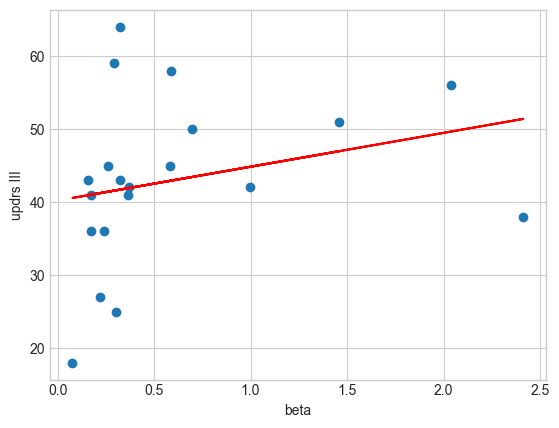

In [80]:
x_values = fu3m_data["beta_average_l_r_average"].astype(float)
y_values = fu3m_data["updrs_III_m0s0"].astype(float)

plt.scatter(x_values, y_values) #c=fu3m_data['subject'].map({'A': 'red', 'B': 'blue', 'C': 'green'}), label="subject")
plt.xlabel("beta")
plt.ylabel("updrs III")
#plt.legend(fu3m_data["subject"])

# Create a custom legend based on the 'legend_column'
# legend_labels = fu3m_data['subject'].unique()
# legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels, ['red', 'blue', 'green'])]
# plt.legend(handles=legend_handles, title='Subjects')

# add a correlation line
fit = np.polyfit(x_values, y_values, 1)
line = np.poly1d(fit)
plt.plot(x_values, line(x_values), color='red', label=f'Correlation (r={correlation.statistic:.2f})')




figure:  spearman_corr_updrs_beta_average_l_r_average_ring.png 
written in:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/figures
figure:  spearman_corr_updrs_beta_average_l_r_average_segm_inter.png 
written in:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/figures
figure:  spearman_corr_updrs_beta_average_l_r_average_segm_intra.png 
written in:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/figures


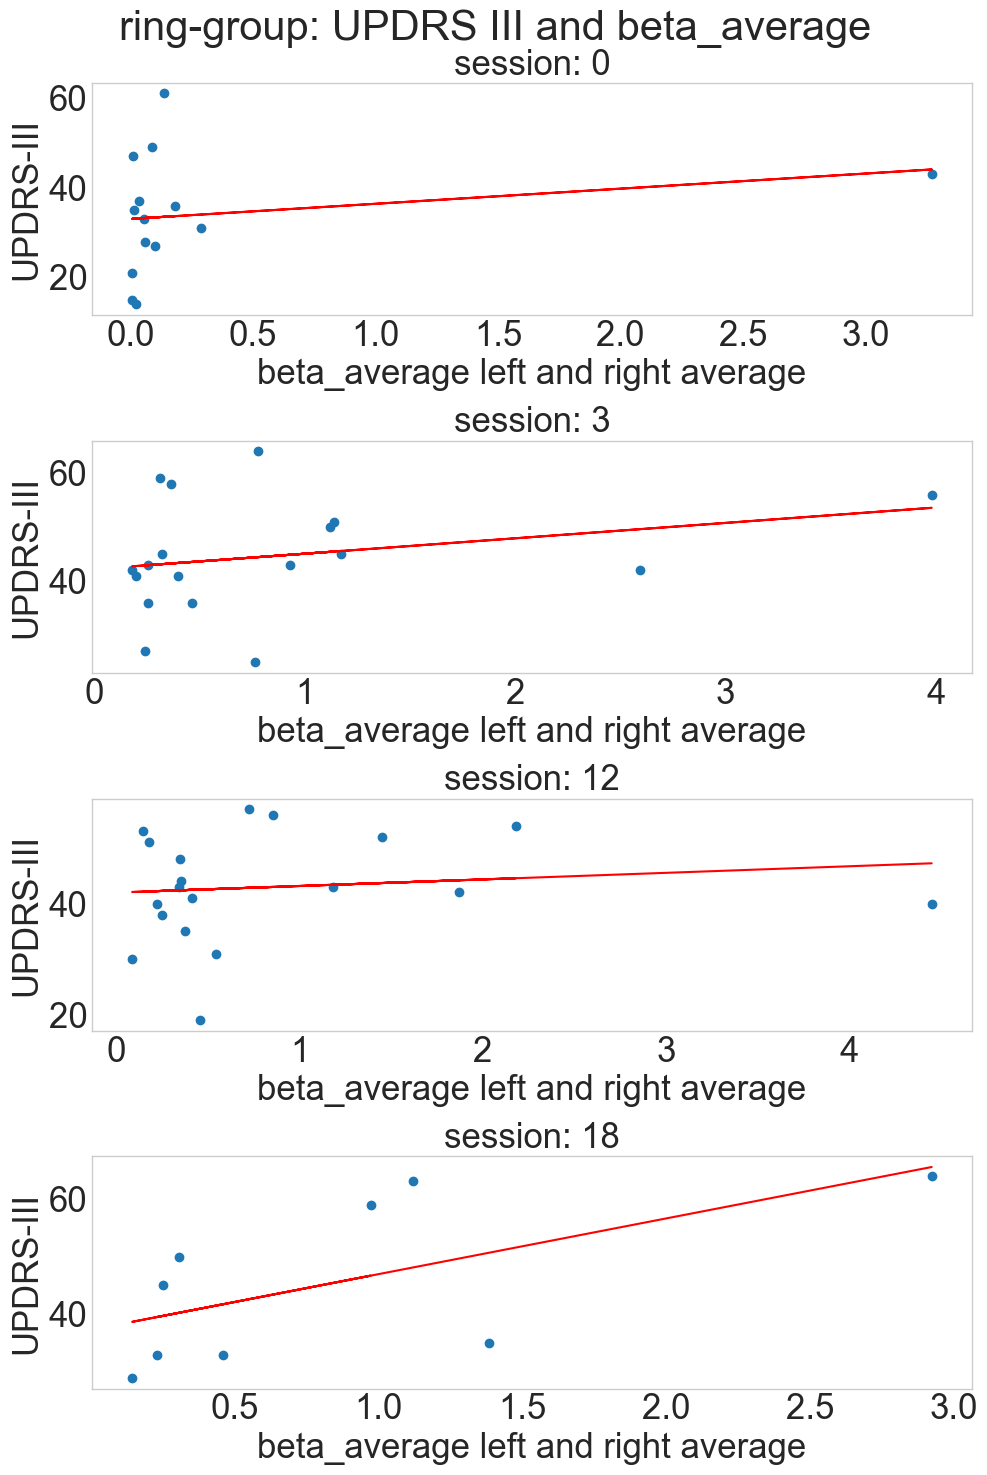

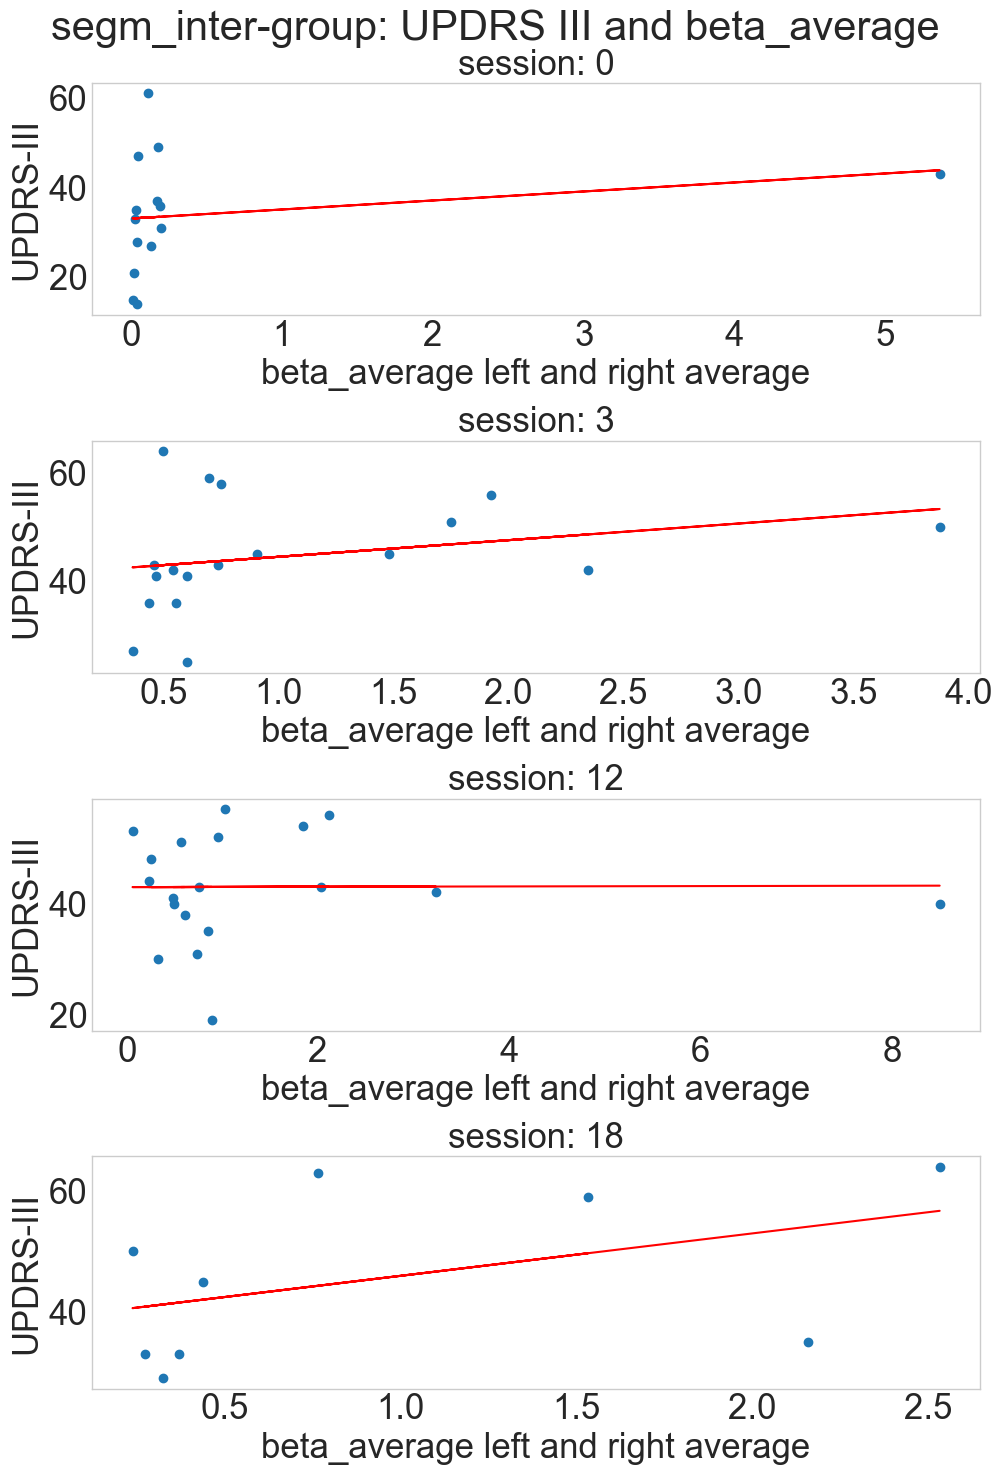

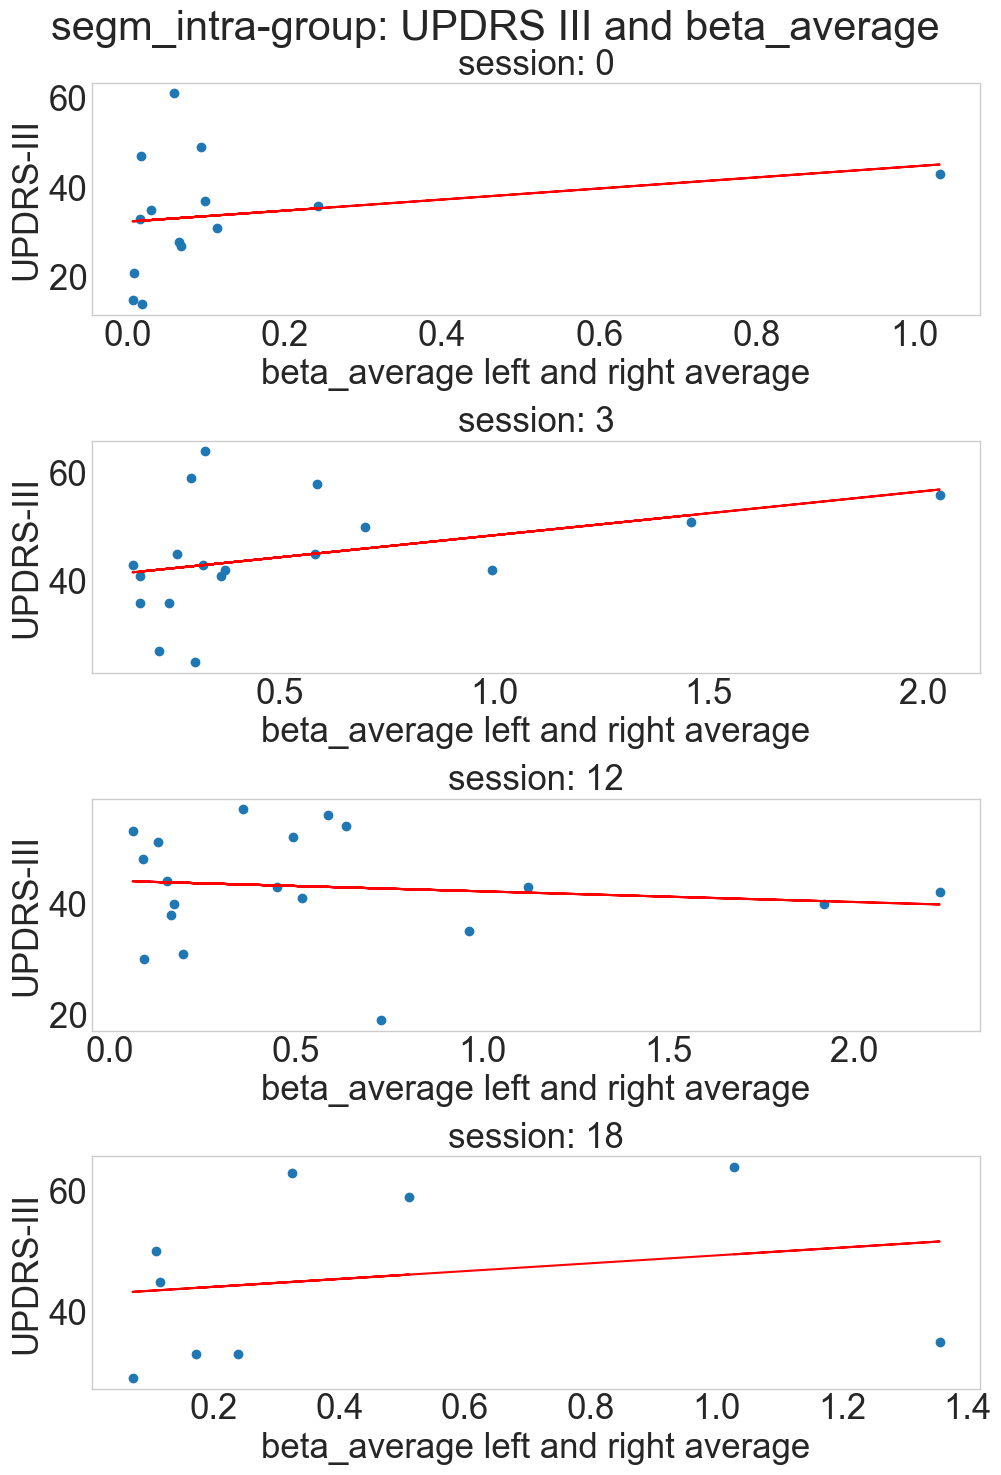

In [59]:
correlation_updrs_beta = updrs_beta.correlate_scatterplot_updrs_beta_per_session(
    highest_beta_session="highest_each_session",
    data_to_fit="beta_average"
)

In [60]:
correlation_updrs_beta

,channel_group,session,sample_size,spearman_corr_coeff,spearman_corr_pval
ring_0,ring,0,14,0.410989,0.144333
ring_3,ring,3,18,0.373514,0.126811
ring_12,ring,12,19,0.208955,0.390608
ring_18,ring,18,9,0.72804,0.026154
segm_inter_0,segm_inter,0,14,0.542857,0.044864
segm_inter_3,segm_inter,3,18,0.497674,0.035586
segm_inter_12,segm_inter,12,19,0.118525,0.628901
segm_inter_18,segm_inter,18,9,0.569043,0.109804
segm_intra_0,segm_intra,0,14,0.437363,0.117845
segm_intra_3,segm_intra,3,18,0.501812,0.033846


figure:  spearman_corr_updrs_beta_average_l_r_average_all_sessions.png 
written in:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/figures


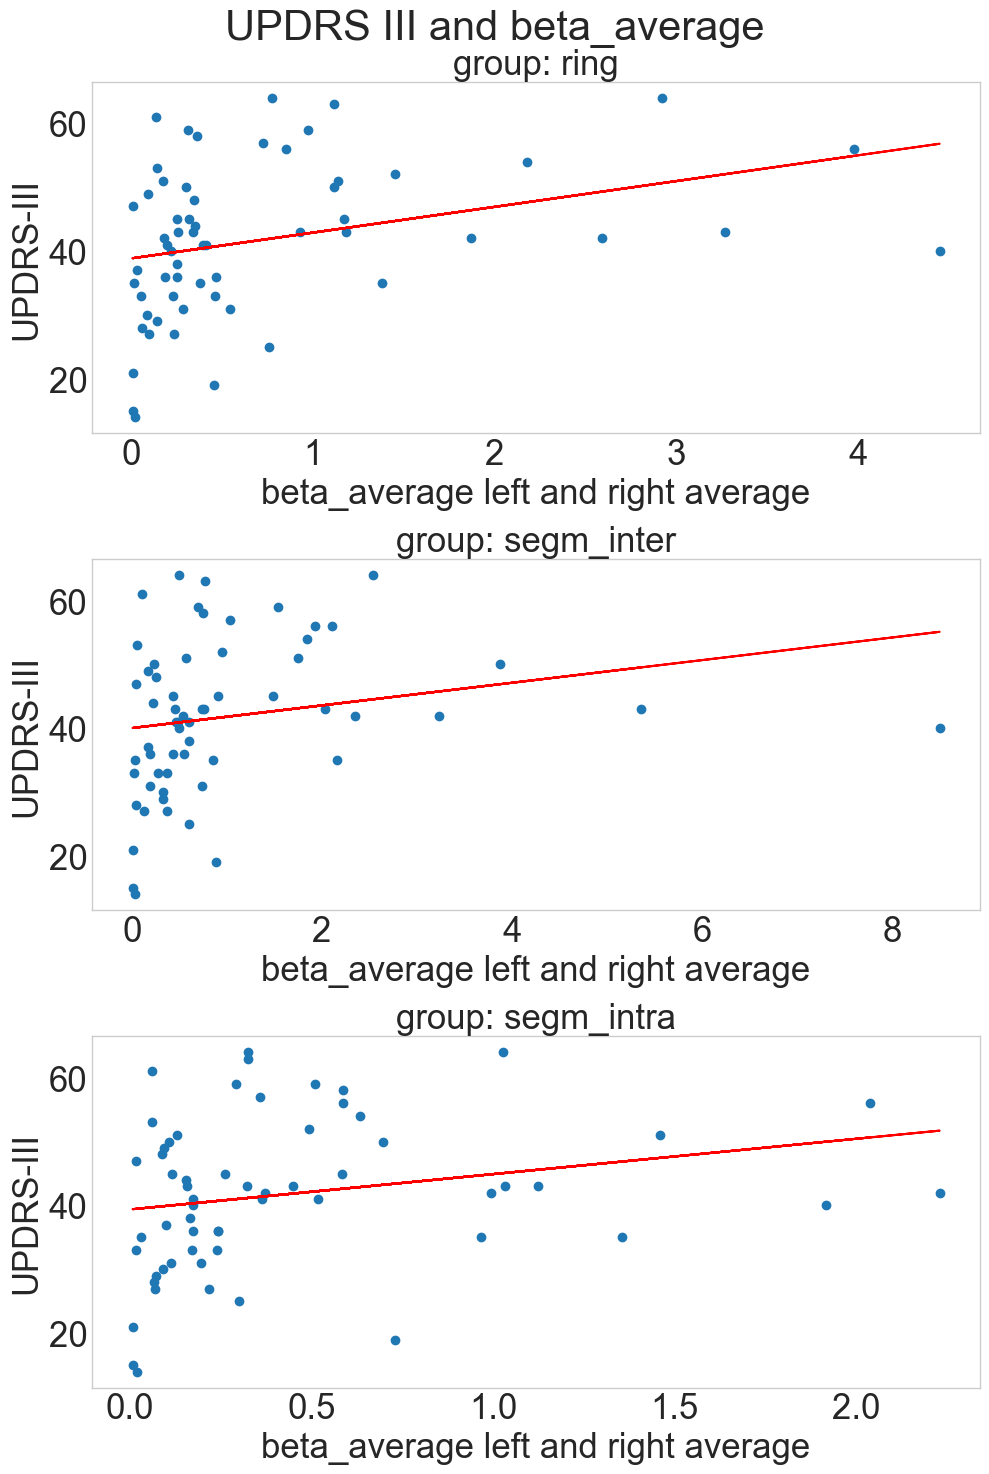

In [61]:
correlation_all_sessions_together = updrs_beta.correlate_scatterplot_updrs_beta_all_sessions(
    highest_beta_session="highest_each_session",
    data_to_fit="beta_average")

In [62]:
correlation_all_sessions_together

,channel_group,sample_size,spearman_corr_coeff,spearman_corr_pval
ring,ring,60,0.427984,0.000647
segm_inter,segm_inter,60,0.423368,0.000751
segm_intra,segm_intra,60,0.350712,0.006009
